In [3]:
import numpy as np

def clean_features(df):
    X = df.drop(columns=["label"]).select_dtypes(include=[np.number]).copy()

    # Replace inf with NaN
    X.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop or impute NaNs (here we drop rows with any NaN)
    mask = ~X.isna().any(axis=1)
    X_clean = X.loc[mask]
    
    # Also clean labels accordingly
    y_clean = df.loc[mask, "label"]

    return X_clean, y_clean


5 fold

In [4]:
def evaluate_classifier_cv(df, title):
    X, y = clean_features(df)

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    from sklearn.model_selection import StratifiedKFold
    n_splits = 5  # reduce folds due to small classes
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y_encoded):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        from sklearn.ensemble import RandomForestClassifier
        clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    print(f"\n==== {n_splits}-Fold Classification Report: {title} ====\n")
    print(classification_report(all_y_true, all_y_pred, target_names=le.classes_))

    cm = confusion_matrix(all_y_true, all_y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    fig, ax = plt.subplots(figsize=(12, 10))
    disp.plot(cmap="viridis", ax=ax, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {title}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{title}_cv.pdf")
    plt.show()




==== Evaluating dataset: RAW ====



/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



==== 5-Fold Classification Report: raw ====

              precision    recall  f1-score   support

         ACV       0.67      0.17      0.27        12
         CEP       0.00      0.00      0.00        15
        DCEP       0.72      0.68      0.70        76
     DCEP-FU       0.00      0.00      0.00         9
       DCEPS       0.00      0.00      0.00         5
        DSCT       0.84      0.31      0.45        52
           E       0.00      0.00      0.00         4
          EA       0.80      0.88      0.84       311
          EB       0.51      0.19      0.28        94
          EC       0.63      0.52      0.57        95
          ED       0.33      0.05      0.08        42
          EW       0.75      0.90      0.82       810
        HADS       0.67      0.24      0.35        17
           L       0.31      0.05      0.09       179
         ROT       0.66      0.64      0.65       587
          RR       0.00      0.00      0.00         4
        RRAB       0.81      0.89  

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

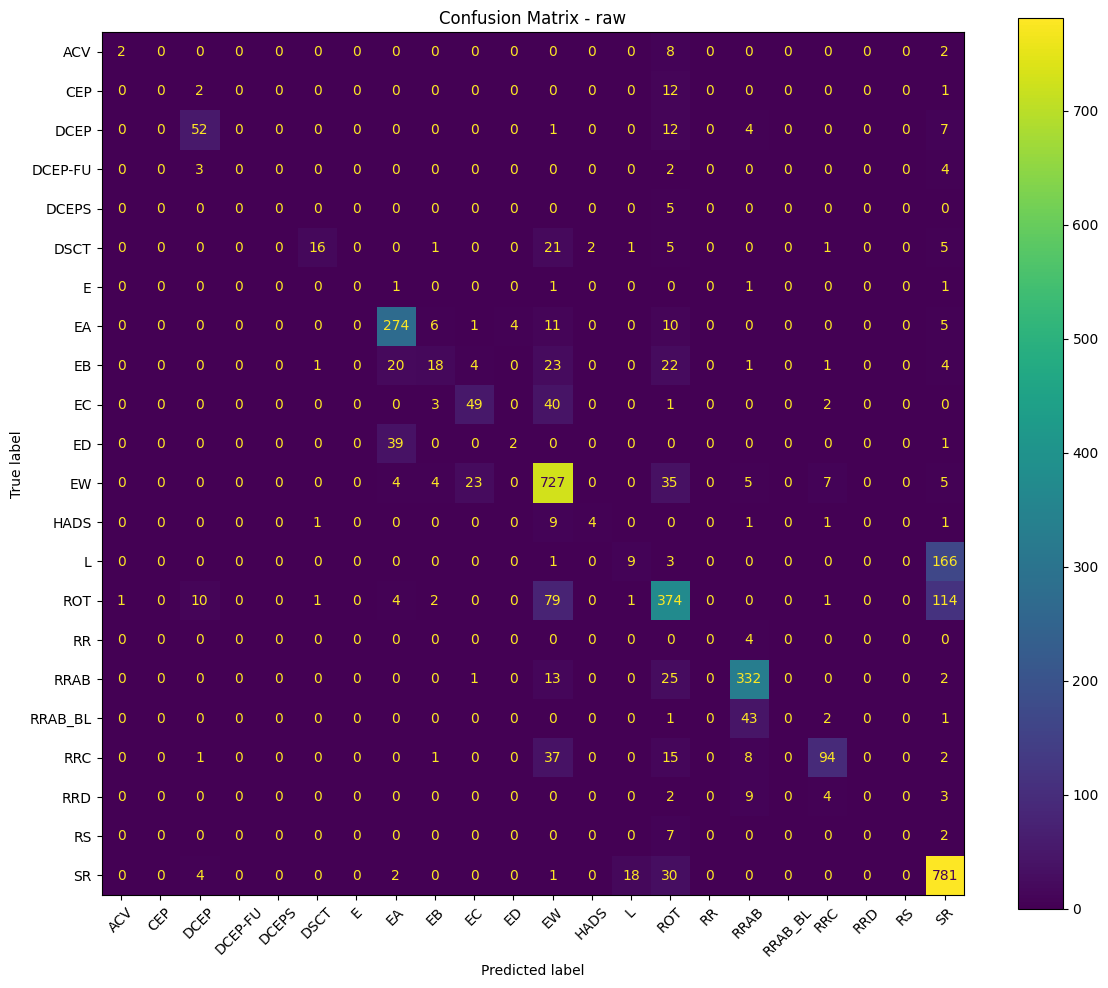



==== Evaluating dataset: MEDIAN ====


==== 5-Fold Classification Report: median ====

                                        precision    recall  f1-score   support

    _lc_median_after_cbv_detrended_ACV       0.64      0.33      0.44        21
    _lc_median_after_cbv_detrended_CEP       0.00      0.00      0.00        22
   _lc_median_after_cbv_detrended_DCEP       0.83      0.68      0.74        77
_lc_median_after_cbv_detrended_DCEP-FU       0.00      0.00      0.00        10
  _lc_median_after_cbv_detrended_DCEPS       0.00      0.00      0.00         6
   _lc_median_after_cbv_detrended_DSCT       0.90      0.39      0.55        71
      _lc_median_after_cbv_detrended_E       0.00      0.00      0.00         8
     _lc_median_after_cbv_detrended_EA       0.80      0.92      0.86       447
     _lc_median_after_cbv_detrended_EB       0.62      0.26      0.37       121
     _lc_median_after_cbv_detrended_EC       0.70      0.55      0.62       124
     _lc_median_after_cbv_detr

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

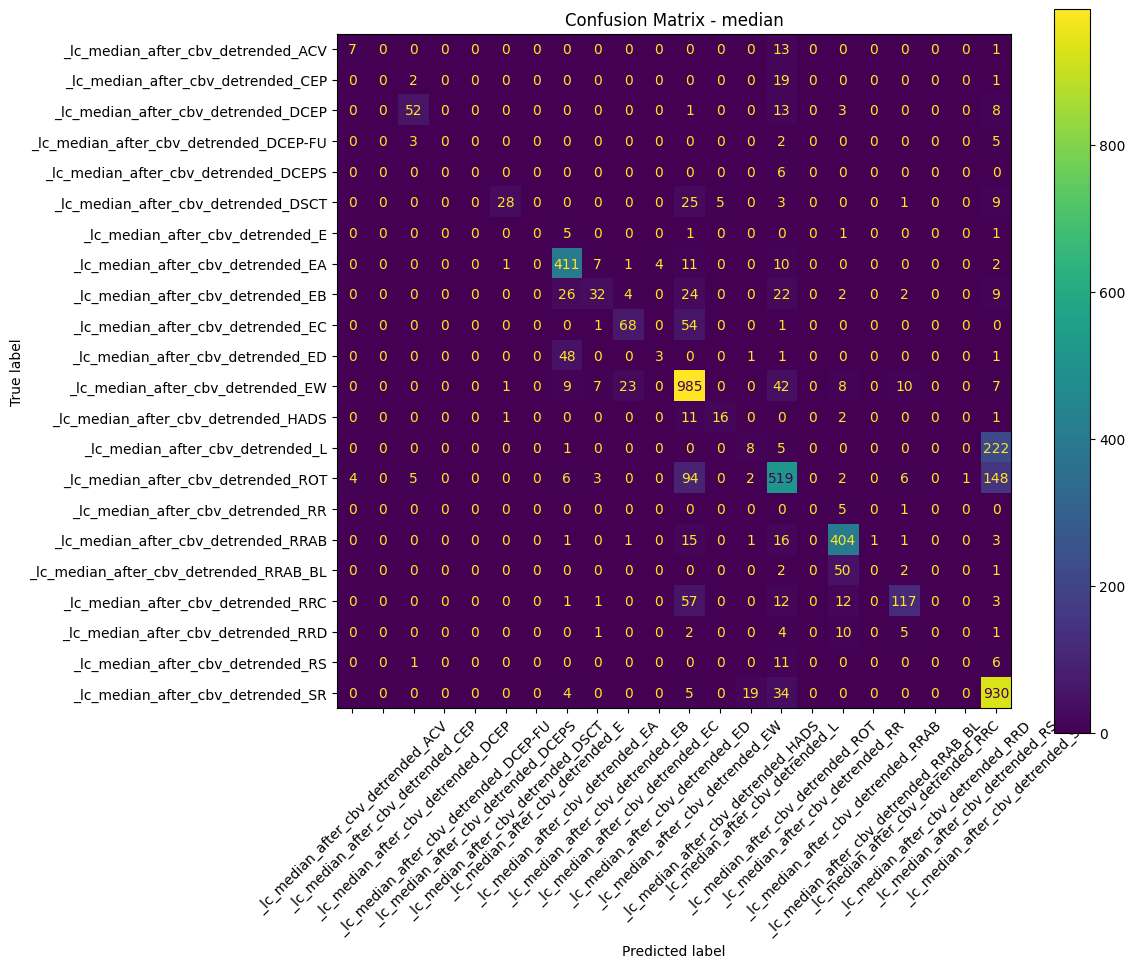



==== Evaluating dataset: CLEANED ====


==== 5-Fold Classification Report: cleaned ====

              precision    recall  f1-score   support

         ACV       0.60      0.14      0.23        21
         CEP       0.00      0.00      0.00        22
        DCEP       0.75      0.62      0.68        77
     DCEP-FU       0.00      0.00      0.00        10
       DCEPS       0.00      0.00      0.00         6
        DSCT       0.83      0.48      0.61        71
           E       0.00      0.00      0.00         8
          EA       0.80      0.91      0.85       447
          EB       0.59      0.26      0.37       121
          EC       0.69      0.57      0.63       124
          ED       0.14      0.02      0.03        54
          EW       0.81      0.92      0.86      1092
        HADS       0.81      0.68      0.74        31
           L       0.33      0.06      0.09       236
         ROT       0.74      0.69      0.72       790
          RR       0.00      0.00      0.00 

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

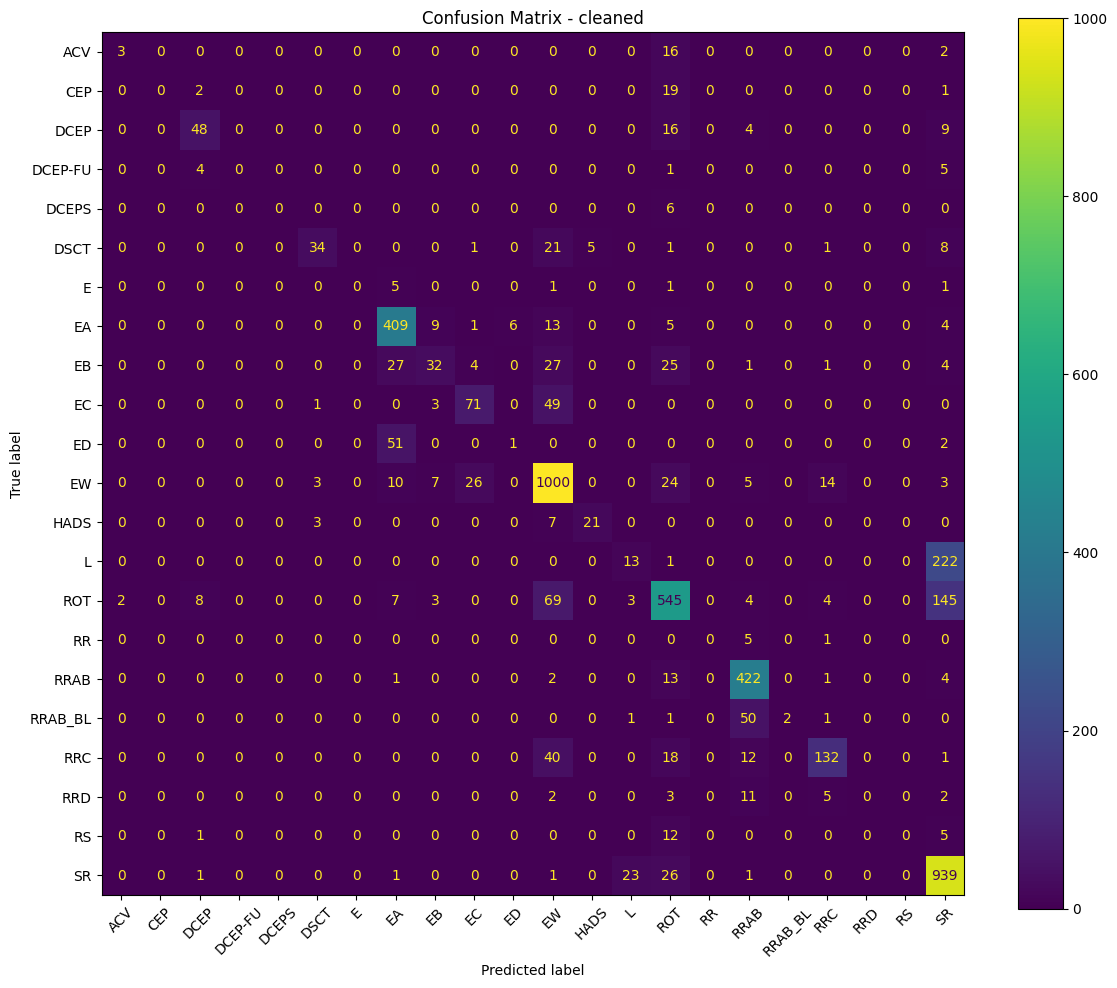

In [5]:
for name, df in datasets.items():
    print(f"\n\n==== Evaluating dataset: {name.upper()} ====\n")
    evaluate_classifier_cv(df, title=name)




==== Evaluating dataset: RAW ====



/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



==== 5-Fold Classification Report: raw ====

              precision    recall  f1-score   support

         ACV       0.67      0.17      0.27        12
         CEP       0.00      0.00      0.00        15
        DCEP       0.72      0.68      0.70        76
     DCEP-FU       0.00      0.00      0.00         9
       DCEPS       0.00      0.00      0.00         5
        DSCT       0.84      0.31      0.45        52
           E       0.00      0.00      0.00         4
          EA       0.80      0.88      0.84       311
          EB       0.51      0.19      0.28        94
          EC       0.63      0.52      0.57        95
          ED       0.33      0.05      0.08        42
          EW       0.75      0.90      0.82       810
        HADS       0.67      0.24      0.35        17
           L       0.31      0.05      0.09       179
         ROT       0.66      0.64      0.65       587
          RR       0.00      0.00      0.00         4
        RRAB       0.81      0.89  

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

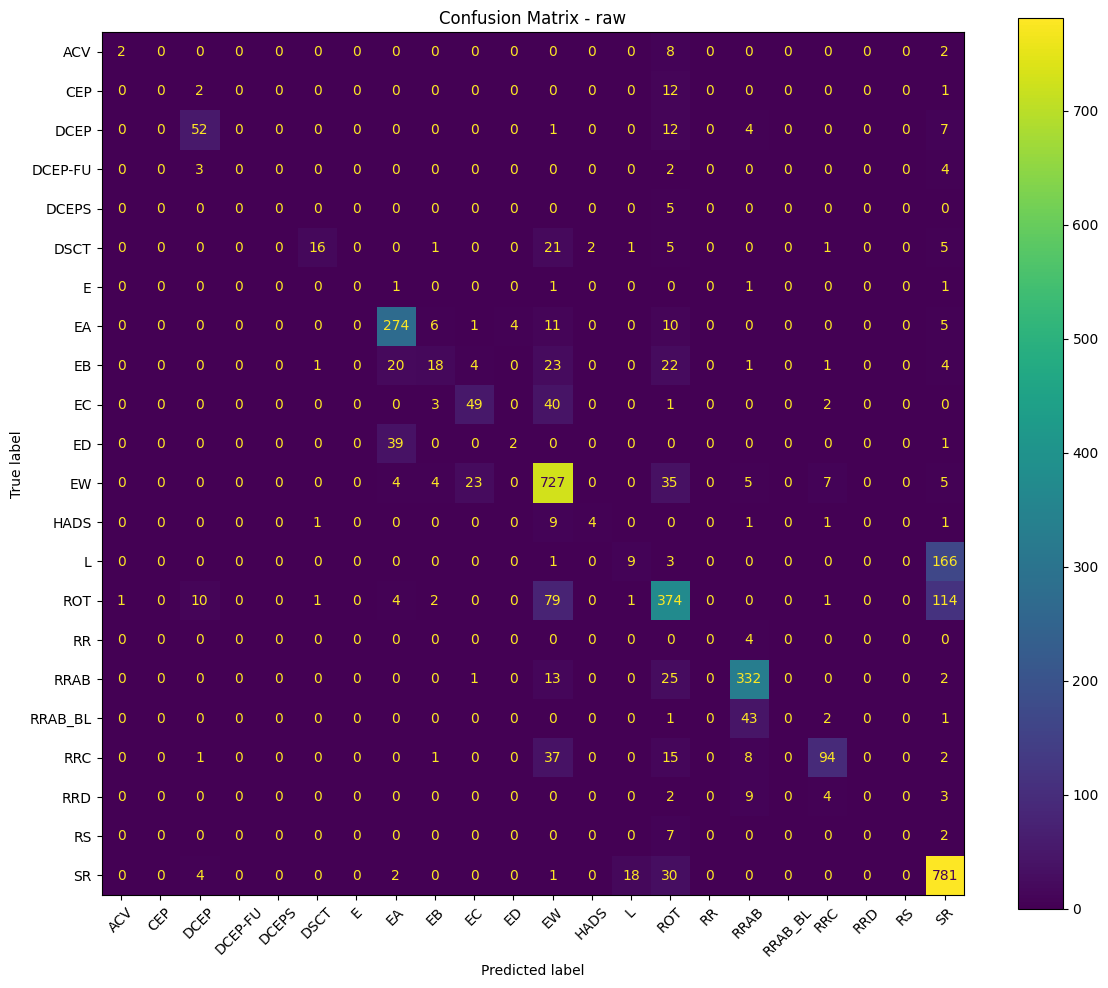



==== Evaluating dataset: MEDIAN ====


==== 5-Fold Classification Report: median ====

                                        precision    recall  f1-score   support

    _lc_median_after_cbv_detrended_ACV       0.64      0.33      0.44        21
    _lc_median_after_cbv_detrended_CEP       0.00      0.00      0.00        22
   _lc_median_after_cbv_detrended_DCEP       0.83      0.68      0.74        77
_lc_median_after_cbv_detrended_DCEP-FU       0.00      0.00      0.00        10
  _lc_median_after_cbv_detrended_DCEPS       0.00      0.00      0.00         6
   _lc_median_after_cbv_detrended_DSCT       0.90      0.39      0.55        71
      _lc_median_after_cbv_detrended_E       0.00      0.00      0.00         8
     _lc_median_after_cbv_detrended_EA       0.80      0.92      0.86       447
     _lc_median_after_cbv_detrended_EB       0.62      0.26      0.37       121
     _lc_median_after_cbv_detrended_EC       0.70      0.55      0.62       124
     _lc_median_after_cbv_detr

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

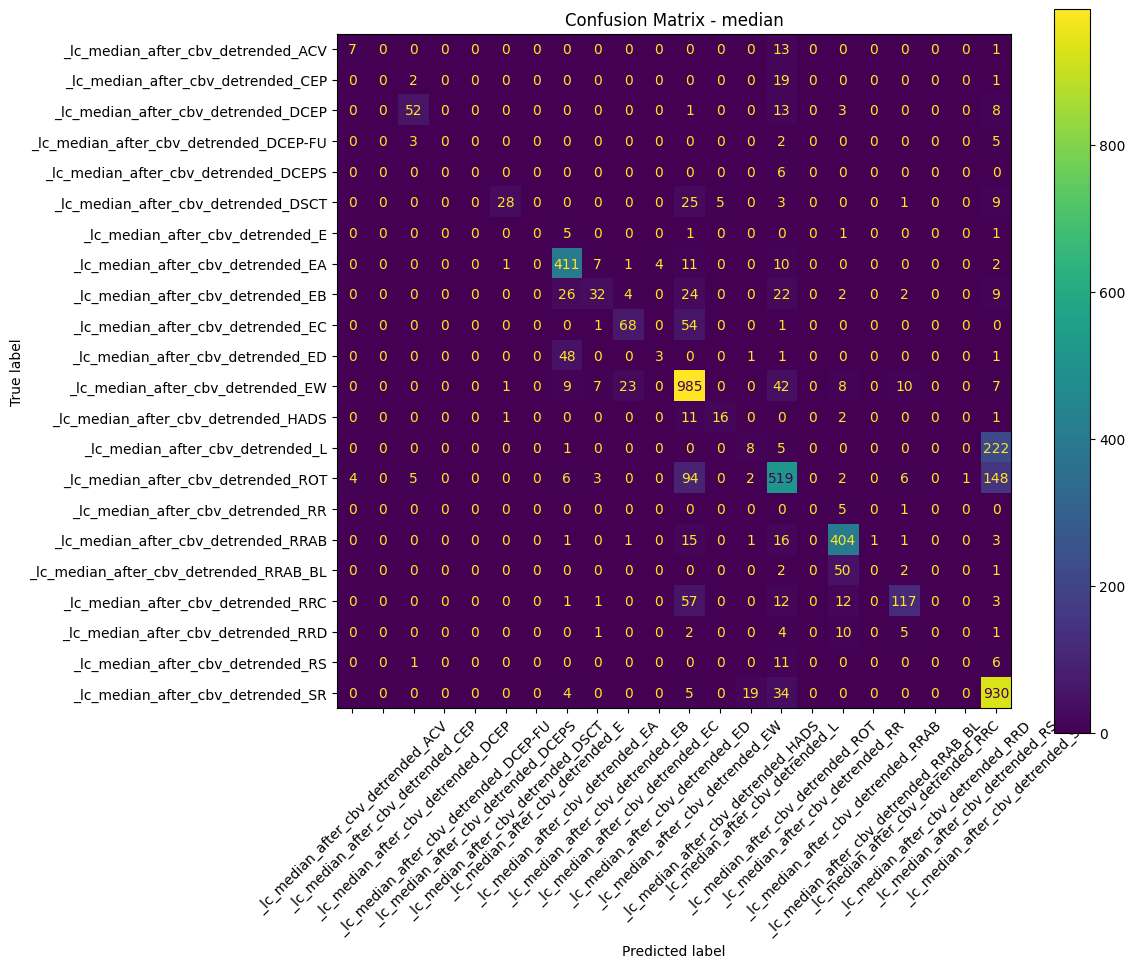



==== Evaluating dataset: CLEANED ====


==== 5-Fold Classification Report: cleaned ====

              precision    recall  f1-score   support

         ACV       0.60      0.14      0.23        21
         CEP       0.00      0.00      0.00        22
        DCEP       0.75      0.62      0.68        77
     DCEP-FU       0.00      0.00      0.00        10
       DCEPS       0.00      0.00      0.00         6
        DSCT       0.83      0.48      0.61        71
           E       0.00      0.00      0.00         8
          EA       0.80      0.91      0.85       447
          EB       0.59      0.26      0.37       121
          EC       0.69      0.57      0.63       124
          ED       0.14      0.02      0.03        54
          EW       0.81      0.92      0.86      1092
        HADS       0.81      0.68      0.74        31
           L       0.33      0.06      0.09       236
         ROT       0.74      0.69      0.72       790
          RR       0.00      0.00      0.00 

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

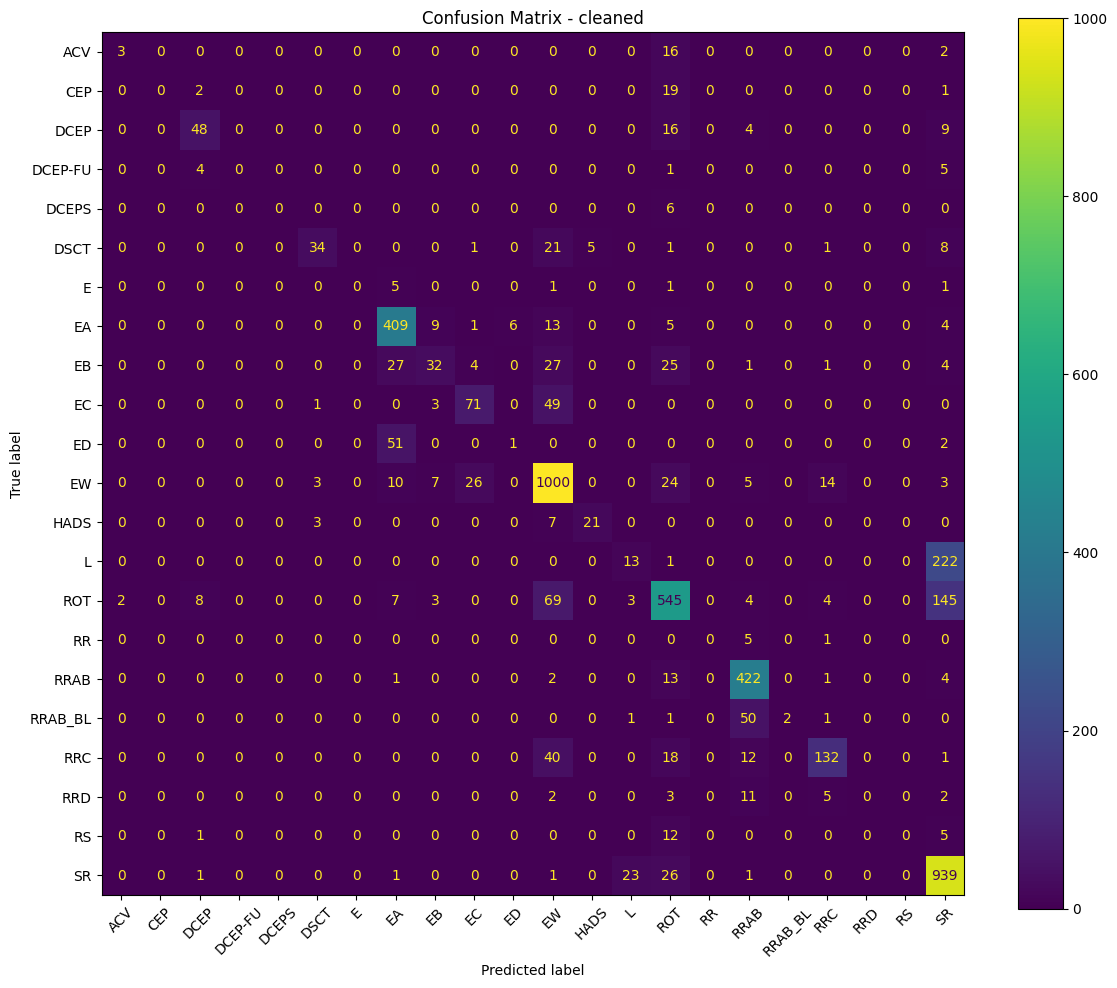

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Paths to your feature CSV files
feature_files = {
    "raw": "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_raw.csv",
    "median": "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_median_after_detrended.csv",
    "cleaned": "/home/devika/PhD/S1/Astroinformatics/Project/Results/TESS_features_outliercleaned.csv"
}
# Load datasets and ensure 'label' column exists
datasets = {}
for name, filepath in feature_files.items():
    df = pd.read_csv(filepath)
    if 'label' not in df.columns:
        if 'Variable_Type' in df.columns:
            df = df.rename(columns={'Variable_Type': 'label'})
        else:
            raise ValueError(f"No label column found in {name} dataset")
    datasets[name] = df

# Function to clean features (remove inf, NaN rows)
def clean_features(df):
    X = df.drop(columns=["label"]).select_dtypes(include=[np.number]).copy()
    # Replace inf/-inf with NaN
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    # Remove rows with any NaN
    mask = ~X.isna().any(axis=1)
    X_clean = X.loc[mask]
    y_clean = df.loc[mask, "label"]
    return X_clean, y_clean

# Evaluation function with 5-fold stratified CV
def evaluate_classifier_cv(df, title):
    X, y = clean_features(df)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y_encoded):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    print(f"\n==== 5-Fold Classification Report: {title} ====\n")
    print(classification_report(all_y_true, all_y_pred, target_names=le.classes_))

    cm = confusion_matrix(all_y_true, all_y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    fig, ax = plt.subplots(figsize=(12, 10))
    disp.plot(cmap="viridis", ax=ax, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {title}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{title}_5fold.pdf")
    plt.show()

# Run evaluation for all datasets
for name, df in datasets.items():
    print(f"\n\n==== Evaluating dataset: {name.upper()} ====\n")
    evaluate_classifier_cv(df, title=name)


10 fold 

In [8]:
def evaluate_classifier_cv(df, title):
    X, y = clean_features(df)
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # changed to 10 folds

    all_y_true = []
    all_y_pred = []

    for train_idx, test_idx in skf.split(X, y_encoded):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

    print(f"\n==== 10-Fold Classification Report: {title} ====\n")
    print(classification_report(all_y_true, all_y_pred, target_names=le.classes_))

    cm = confusion_matrix(all_y_true, all_y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    fig, ax = plt.subplots(figsize=(12, 10))
    disp.plot(cmap="viridis", ax=ax, xticks_rotation=45)
    plt.title(f"Confusion Matrix - {title}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{title}_10fold.pdf")
    plt.show()




==== Evaluating dataset: RAW ====



/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(



==== 10-Fold Classification Report: raw ====

              precision    recall  f1-score   support

         ACV       0.67      0.17      0.27        12
         CEP       0.00      0.00      0.00        15
        DCEP       0.78      0.70      0.74        76
     DCEP-FU       0.00      0.00      0.00         9
       DCEPS       0.00      0.00      0.00         5
        DSCT       0.76      0.37      0.49        52
           E       0.00      0.00      0.00         4
          EA       0.78      0.88      0.83       311
          EB       0.53      0.24      0.34        94
          EC       0.62      0.49      0.55        95
          ED       0.00      0.00      0.00        42
          EW       0.76      0.89      0.82       810
        HADS       0.57      0.24      0.33        17
           L       0.37      0.06      0.10       179
         ROT       0.67      0.65      0.66       587
          RR       0.00      0.00      0.00         4
        RRAB       0.80      0.89 

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

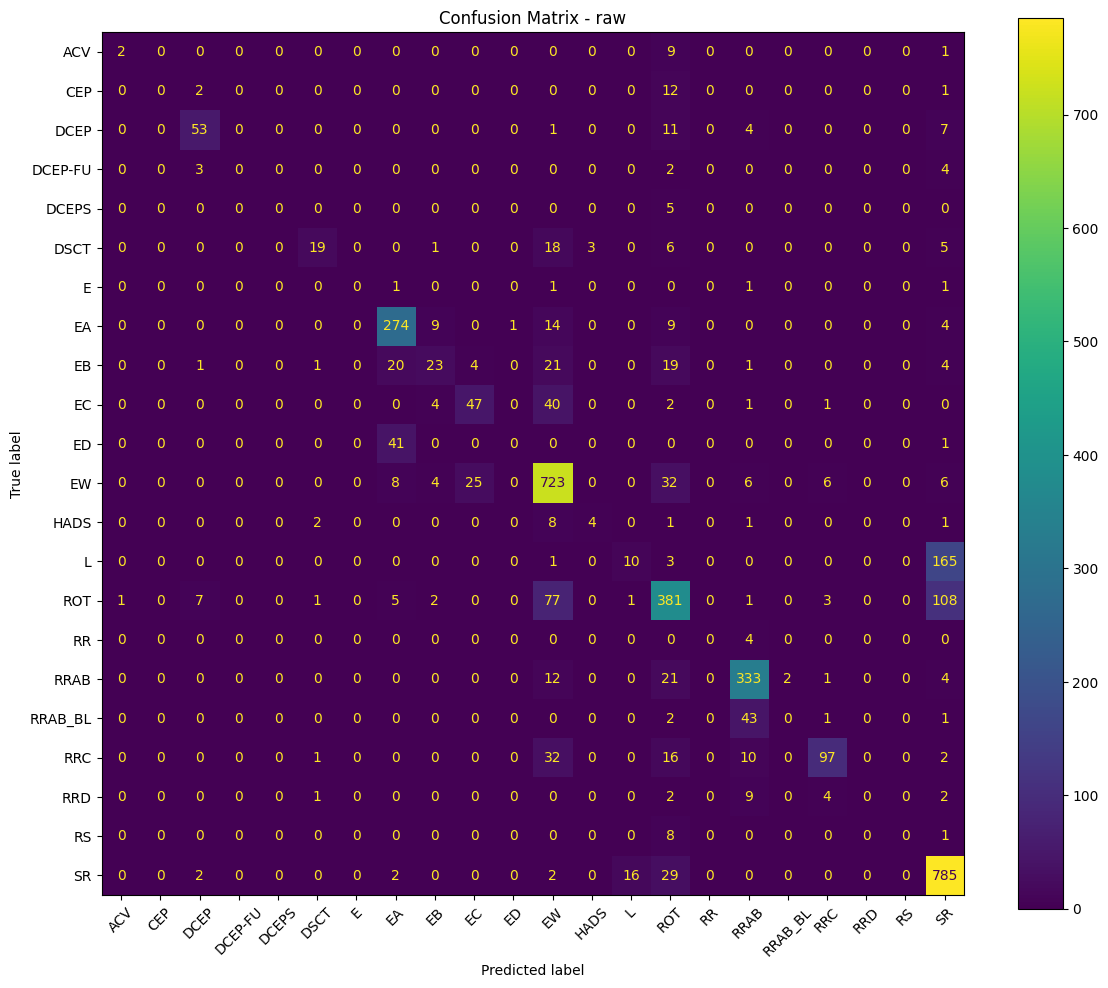



==== Evaluating dataset: MEDIAN ====



/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(



==== 10-Fold Classification Report: median ====

                                        precision    recall  f1-score   support

    _lc_median_after_cbv_detrended_ACV       0.67      0.29      0.40        21
    _lc_median_after_cbv_detrended_CEP       0.00      0.00      0.00        22
   _lc_median_after_cbv_detrended_DCEP       0.75      0.64      0.69        77
_lc_median_after_cbv_detrended_DCEP-FU       0.00      0.00      0.00        10
  _lc_median_after_cbv_detrended_DCEPS       0.00      0.00      0.00         6
   _lc_median_after_cbv_detrended_DSCT       0.88      0.39      0.54        71
      _lc_median_after_cbv_detrended_E       0.00      0.00      0.00         8
     _lc_median_after_cbv_detrended_EA       0.80      0.92      0.86       447
     _lc_median_after_cbv_detrended_EB       0.55      0.22      0.32       121
     _lc_median_after_cbv_detrended_EC       0.66      0.51      0.57       124
     _lc_median_after_cbv_detrended_ED       0.29      0.04      0.07

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

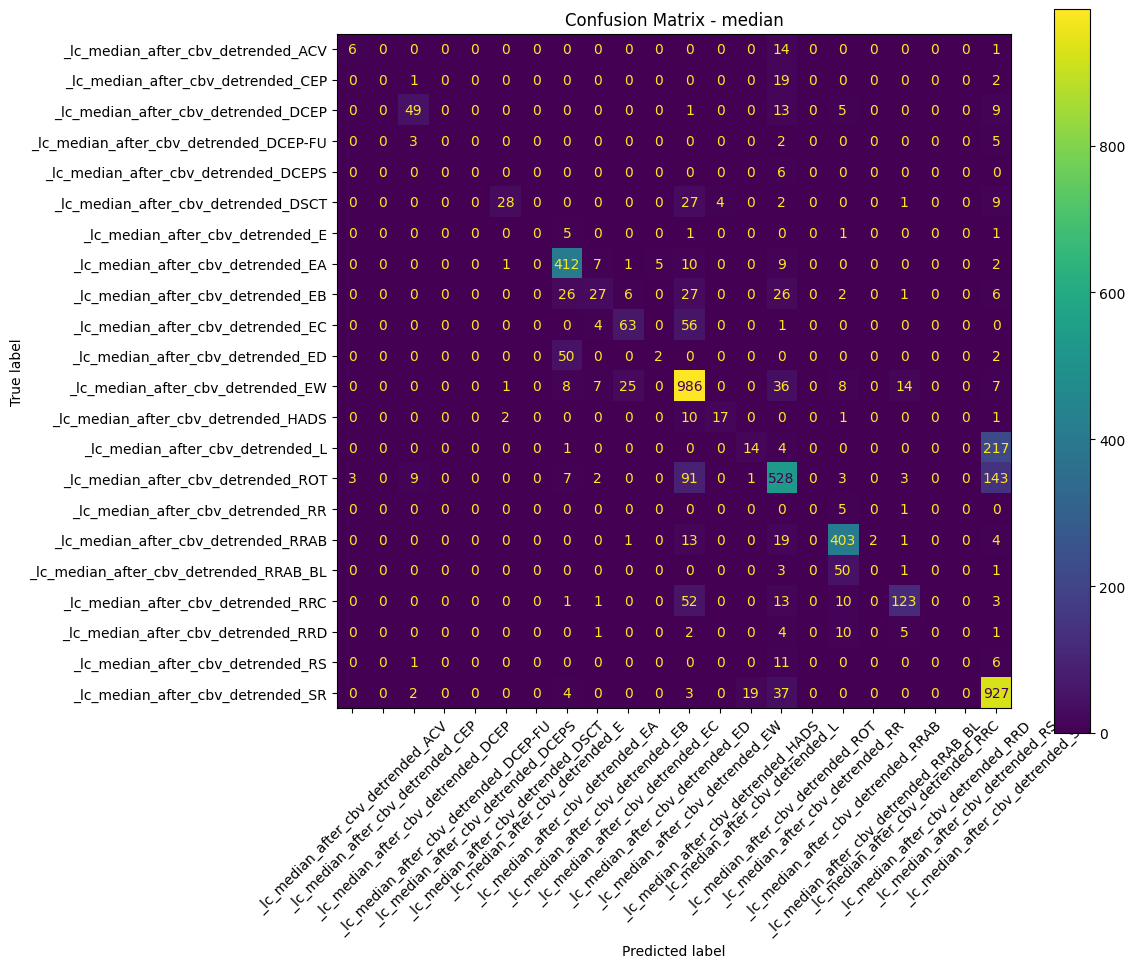



==== Evaluating dataset: CLEANED ====



/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(



==== 10-Fold Classification Report: cleaned ====

              precision    recall  f1-score   support

         ACV       0.75      0.29      0.41        21
         CEP       0.00      0.00      0.00        22
        DCEP       0.78      0.69      0.73        77
     DCEP-FU       0.00      0.00      0.00        10
       DCEPS       0.00      0.00      0.00         6
        DSCT       0.82      0.45      0.58        71
           E       0.00      0.00      0.00         8
          EA       0.80      0.92      0.86       447
          EB       0.62      0.33      0.43       121
          EC       0.66      0.53      0.59       124
          ED       0.25      0.04      0.06        54
          EW       0.81      0.91      0.86      1092
        HADS       0.76      0.71      0.73        31
           L       0.24      0.05      0.08       236
         ROT       0.74      0.68      0.71       790
          RR       0.00      0.00      0.00         6
        RRAB       0.83      0

/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/devika/anaconda3/envs/env_ISLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

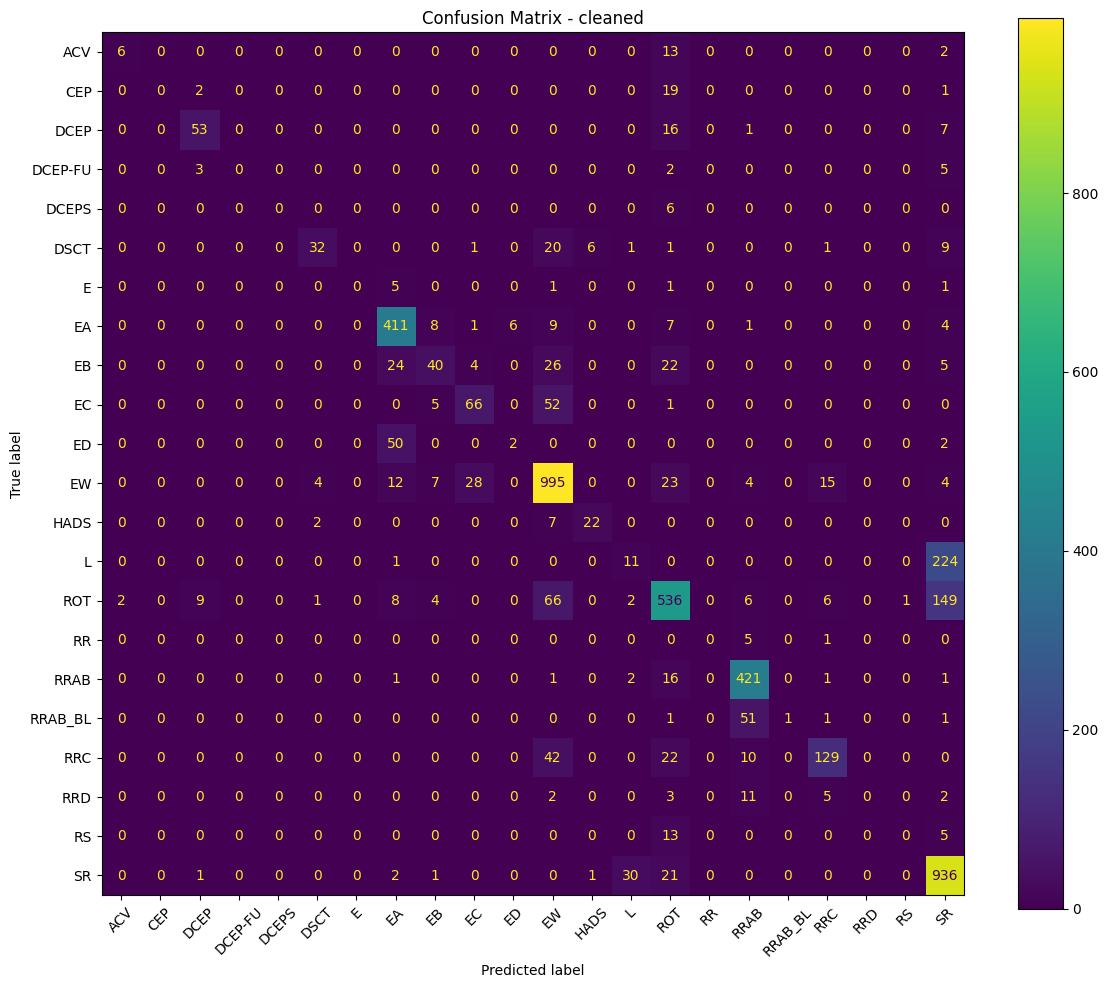

In [9]:
for name, df in datasets.items():
    print(f"\n\n==== Evaluating dataset: {name.upper()} ====\n")
    evaluate_classifier_cv(df, title=name)
